In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # Restrict TensorFlow to only use the first GPU
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU


2023-02-15 12:54:07.768917: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-15 12:54:08.427079: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1608 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 750 Ti, pci bus id: 0000:02:00.0, compute capability: 5.0


In [10]:
DATA_PATH = "./data/"
BATCH_SIZE = 8
IMAGE_SIZE = (256, 256)
SEED = 123

def getDataset(path):
    return tf.keras.utils.image_dataset_from_directory(
                path,
                labels=None,
                color_mode='rgb',
                batch_size=BATCH_SIZE,
                image_size=IMAGE_SIZE,
                shuffle=True,
                seed=SEED,
                validation_split=None,
                interpolation='bilinear',
                crop_to_aspect_ratio=True,
            )

In [11]:
train_x = getDataset(DATA_PATH + "training/images")
train_y = getDataset(DATA_PATH + "training/instances")

Found 800 files belonging to 1 classes.
Found 800 files belonging to 1 classes.


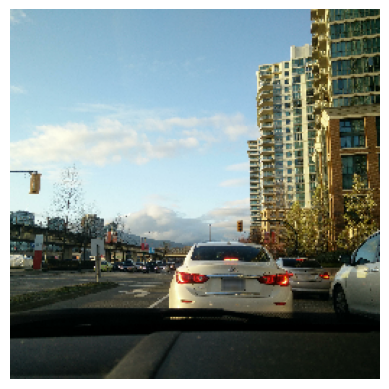

In [13]:
for batch in train_x.take(1):
    im = batch[0].numpy().astype("uint8")
    plt.imshow(im)
    plt.axis("off")

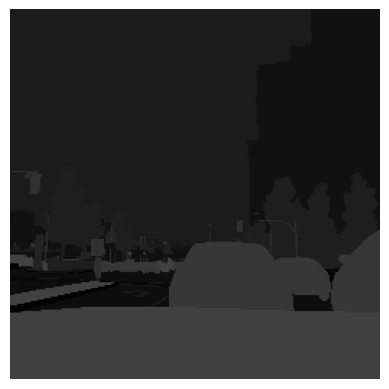

In [14]:
for batch in train_y.take(1):
    im = batch[0].numpy().astype("uint8")
    plt.imshow(im)
    plt.axis("off")

In [15]:
test_x = getDataset(DATA_PATH + "validation/images")
test_y = getDataset(DATA_PATH + "validation/instances")

Found 200 files belonging to 1 classes.
Found 200 files belonging to 1 classes.
